# Coco Api Tutorial

This notebook shows how to use [pycoco api](https://github.com/cocodataset/cocoapi) and create a small test dataset.
The package can be installed from the source cod, by doing

```
pip install cython
git clone git@github.com:cocodataset/cocoapi.git
cd PythonAPI
make
```

or by doing

```
pip install pycocotools
```

Then you need to download the [coco dataset](http://cocodataset.org/#download)

In [43]:
from pycocotools.coco import COCO
from imageio import imread
import matplotlib.pyplot as plt

In [44]:
coco = COCO('hair_drier_toaster_bear.json')

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


Show the categories

In [45]:
categories = coco.loadCats(coco.getCatIds())
print([cat['name'] for cat in categories])

['bear', 'toaster', 'hair drier']


In [46]:
categories

[{'supercategory': 'animal', 'id': 23, 'name': 'bear'},
 {'supercategory': 'appliance', 'id': 80, 'name': 'toaster'},
 {'supercategory': 'indoor', 'id': 89, 'name': 'hair drier'}]

Filter some categories from the dataset

In [47]:
cat_ids = coco.getCatIds(catNms=['bear', 'toaster', 'hair drier'])
cat_ids

[23, 80, 89]

Load the images that contain together the categories

In [49]:
imgIds = coco.getImgIds(catIds=[23])
print(f'loaded {len(imgIds)} images')

loaded 960 images


Let's create a small dataset with 10 images

In [50]:
img_data = coco.loadImgs(imgIds[:10])

In [55]:
i = 2
img = imread(img_data[i]['coco_url'])

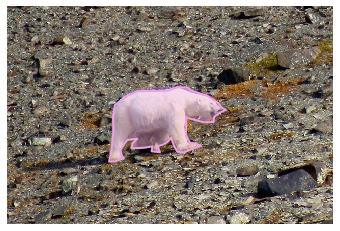

In [56]:
plt.imshow(img)
plt.axis('off')
annIds = coco.getAnnIds(imgIds=[img_data[i]['id']], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)